# group work

## <font color =#1f618d> perparation
- import the packages

In [ ]:
#matplotlib inline

import matplotlib.pyplot as plt
from matplotlib import cm
import numpy as np
import pandas as pd

import statsmodels.formula.api as smf
import statsmodels

In [2]:
# the version of pandas and statsmodels might differ on your system
print("pandas version: {}".format(pd.__version__))
print("statsmodels version: {}".format(statsmodels.__version__))

pandas version: 2.2.2
statsmodels version: 0.14.3


- read the data  
  DownloadRoad Safety Data - Casualties 2023, Format: CSV, Dataset: Road Safety Data

In [3]:
# Load the data as dataframe
df_office = pd.read_csv('https://data.dft.gov.uk/road-accidents-safety-data/dft-road-casualty-statistics-casualty-2023.csv',
                       low_memory=False)#在读取时无法确定数据类型
print(df_office.dtypes)

accident_index                        object
accident_year                          int64
accident_reference                    object
vehicle_reference                      int64
casualty_reference                     int64
casualty_class                         int64
sex_of_casualty                        int64
age_of_casualty                        int64
age_band_of_casualty                   int64
casualty_severity                      int64
pedestrian_location                    int64
pedestrian_movement                    int64
car_passenger                          int64
bus_or_coach_passenger                 int64
pedestrian_road_maintenance_worker     int64
casualty_type                          int64
casualty_home_area_type                int64
casualty_imd_decile                    int64
lsoa_of_casualty                      object
enhanced_casualty_severity             int64
casualty_distance_banding              int64
dtype: object


In [4]:
# Let's visualise the first few rows of each data set:

df_office.head()

,accident_index,accident_year,accident_reference,vehicle_reference,casualty_reference,casualty_class,sex_of_casualty,age_of_casualty,age_band_of_casualty,casualty_severity,...,pedestrian_movement,car_passenger,bus_or_coach_passenger,pedestrian_road_maintenance_worker,casualty_type,casualty_home_area_type,casualty_imd_decile,lsoa_of_casualty,enhanced_casualty_severity,casualty_distance_banding
0,2023010419171,2023,010419171,1,1,3,2,20,4,3,...,1,0,0,0,0,1,10,E01030370,-1,3
1,2023010419183,2023,010419183,2,1,1,1,25,5,3,...,0,0,0,0,9,1,3,E01001546,-1,1
2,2023010419183,2023,010419183,3,2,2,2,38,7,3,...,0,2,0,0,9,-1,-1,-1,-1,-1
3,2023010419189,2023,010419189,1,1,1,1,50,8,3,...,0,0,0,0,9,1,5,E01002443,-1,1
4,2023010419191,2023,010419191,2,1,1,1,34,6,3,...,0,0,0,0,1,1,2,E01004679,-1,2


## <font color =#1f618d> analysis
- <font color =#900C3F>Q: what's basic information of the casualty?  
  <font color ="black">A: casualty number & age, sex and category\
  According to the csv. and the guide(Road Safety Open Data Guide - 2023), they can be found:
  - casualty number: casualty_reference
  - age: age_band_of_casualty (12 categories, including **Data missing or out of range**)  
  - sex : sex_of_casualty (4 categories, including **Data missing or out of range and unknown**)  
  - category - casualty_class (3 categories)

**Before analysis, may we exclude the items that include data missing or unknown?**\
我现在后续分析是没有先排除这类数据

- bar plot of data

> age

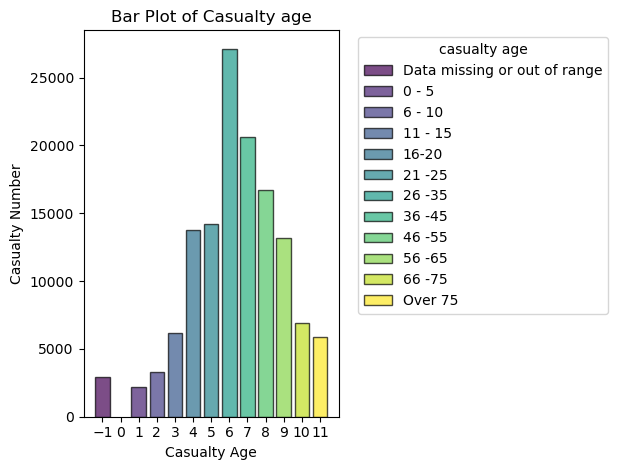

In [27]:
# 统计每个类别的数量
counts = df_office['age_band_of_casualty'].value_counts().sort_index()

# 使用 colormap 生成渐变颜色
colors = cm.viridis(np.linspace(0, 1, len(counts)))

# 定义类别映射到自定义名称
class_labels = {1: '0 - 5', 2: '6 - 10', 3: '11 - 15', 4: '16-20', 5: '21 -25',
                6: '26 -35', 7: '36 -45', 8: '46 -55', 9: '56 -65', 10: '66 -75',
                11: 'Over 75', -1: 'Data missing or out of range'}


# 绘制条形图
for i, (category, count) in enumerate(zip(counts.index, counts.values)):
    plt.bar( category, count, color= colors[i], edgecolor='black', alpha=0.7, label=class_labels.get(category, 'Class {category}'))
    
plt.xticks(range(-1, 12)) # 设置 x 轴刻度
plt.title('Bar Plot of Casualty age')
plt.xlabel('Casualty Age')
plt.ylabel('Casualty Number')
plt.legend(title='casualty age', loc='upper left', bbox_to_anchor=(1.05, 1))
plt.tight_layout()  # 自动调整布局，避免图被遮挡
plt.show()

In [33]:
# 查找包含值-1 的行
rows_with_neg1 = df_office[df_office['age_band_of_casualty'].isin([-1])]
print(rows_with_neg1)
print(f"Rows with -1: {len(rows_with_neg1)}")

       accident_index  accident_year accident_reference  vehicle_reference  \
12      2023010419228           2023          010419228                  1   
13      2023010419228           2023          010419228                  1   
46      2023010419349           2023          010419349                  1   
51      2023010419379           2023          010419379                  2   
72      2023010419418           2023          010419418                  1   
...               ...            ...                ...                ...   
127061  202363C036523           2023          63C036523                  1   
128038  2023991283620           2023          991283620                  1   
128553  2023991295073           2023          991295073                  2   
131349  2023991358538           2023          991358538                  2   
132184  2023991378174           2023          991378174                  3   

        casualty_reference  casualty_class  sex_of_casualty  ag

> sex

In [23]:
#查找所有的值
df_office['sex_of_casualty'].unique() 

array([ 2,  1, -1,  9])

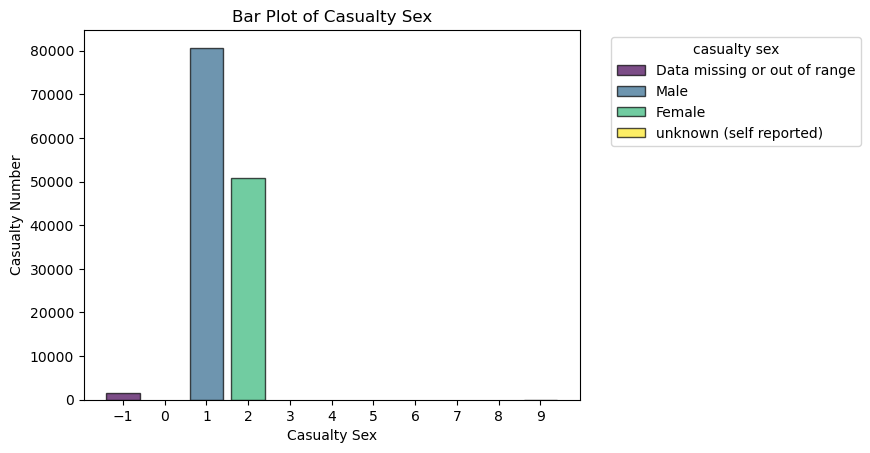

In [28]:
# 统计每个类别的数量
counts = df_office['sex_of_casualty'].value_counts().sort_index()

# 使用 colormap 生成渐变颜色
colors = cm.viridis(np.linspace(0, 1, len(counts)))

# 定义类别映射到自定义名称
class_labels = {1: 'Male', 2: 'Female',9: 'unknown (self reported)', -1: 'Data missing or out of range'}


# 绘制条形图
for i, (category, count) in enumerate(zip(counts.index, counts.values)):
    plt.bar( category, count, color= colors[i], edgecolor='black', alpha=0.7, label=class_labels.get(category, 'Class {category}'))
    
plt.xticks(range(-1, 10))  # 设置 x 轴刻度
plt.title('Bar Plot of Casualty Sex')
plt.xlabel('Casualty Sex')
plt.ylabel('Casualty Number')
plt.legend(title='casualty sex', loc='upper left', bbox_to_anchor=(1.05, 1))
plt.show()

In [32]:
# 查找包含值 9 的行
rows_with_9 = df_office[df_office['sex_of_casualty'].isin([9])]
print(rows_with_9)
print(f"Rows with 9: {len(rows_with_9)}")

       accident_index  accident_year accident_reference  vehicle_reference  \
90881   2023430174765           2023          430174765                  1   
91428   2023430258181           2023          430258181                  1   
92113   2023430368478           2023          430368478                  1   
92926   2023430508839           2023          430508839                  2   
115704  2023520400286           2023          520400286                  2   
116149  2023522300468           2023          522300468                  2   
117341  2023522400416           2023          522400416                  1   
117457  2023522400636           2023          522400636                  2   

        casualty_reference  casualty_class  sex_of_casualty  age_of_casualty  \
90881                    1               2                9               28   
91428                    1               1                9               23   
92113                    1               2               

> category

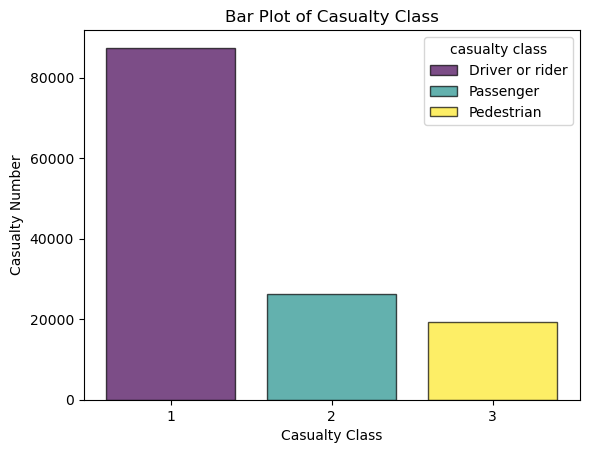

In [7]:
# 统计每个类别的数量
counts = df_office['casualty_class'].value_counts().sort_index()

# 使用 colormap 生成渐变颜色
colors = cm.viridis(np.linspace(0, 1, len(counts)))

# 定义类别映射到自定义名称
class_labels = {1: 'Driver or rider', 2: 'Passenger', 3: 'Pedestrian'}


# 绘制条形图
for i, (category, count) in enumerate(zip(counts.index, counts.values)):
    plt.bar( category, count, color= colors[i], edgecolor='black', alpha=0.7, label=class_labels.get(category, 'Class {category}'))
    
plt.xticks([1, 2, 3])  # 设置 x 轴刻度
plt.title('Bar Plot of Casualty Class')
plt.xlabel('Casualty Class')
plt.ylabel('Casualty Number')
plt.legend(title='casualty class')
plt.show()

- scatter plot of sex and age

<Axes: xlabel='age_band_of_casualty', ylabel='sex_of_casualty'>

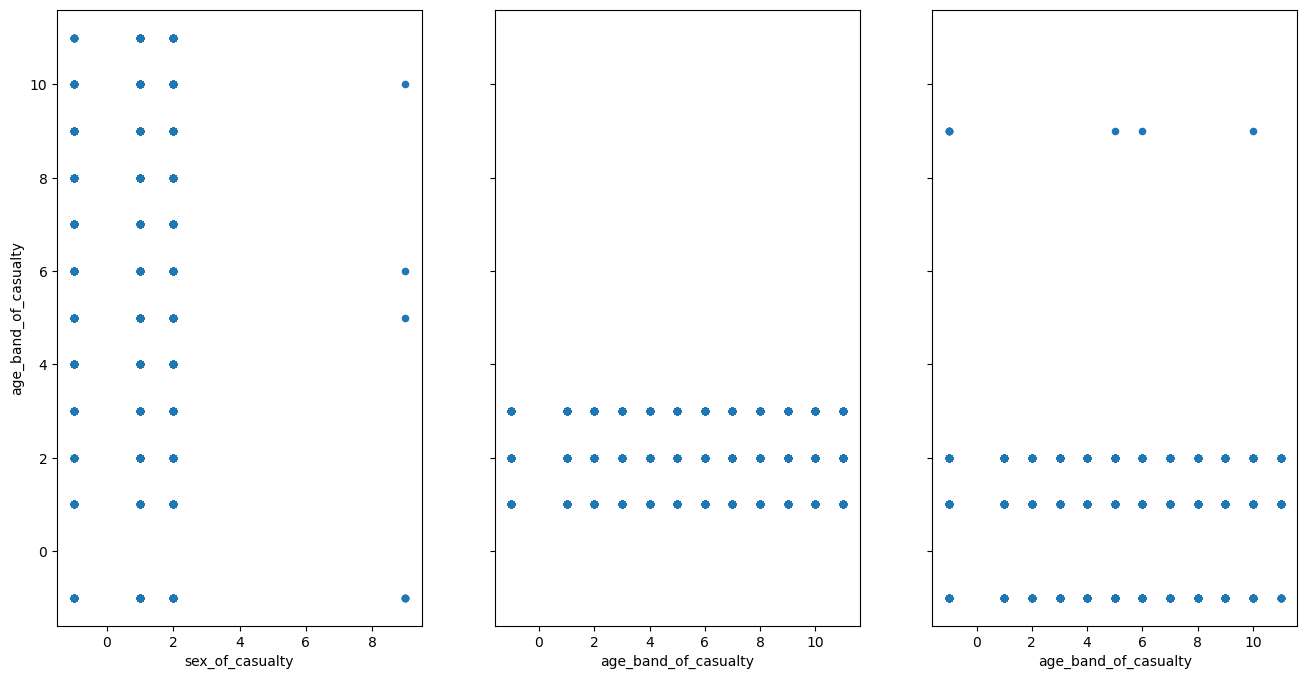

In [38]:
fig, axs = plt.subplots(1, 3, sharey=True)
df_office.plot(kind='scatter', x='sex_of_casualty', y='age_band_of_casualty', ax=axs[0], figsize=(16, 8))
df_office.plot(kind='scatter', x='age_band_of_casualty', y='casualty_class', ax=axs[1])
df_office.plot(kind='scatter', x='age_band_of_casualty', y='sex_of_casualty', ax=axs[2])